<a href="https://colab.research.google.com/github/caseywdunn/python_graphics/blob/main/linear_algebra_of_computer_graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# A 3D graphics engine in Python

> By Casey Dunn and Henry Dunn

Here we implement a 3D graphics engine using standard Python tools in data science, numpy and matplotlib. The goal is to introduce data scientists to the linear algebra used in 3D graphics. This in turn is a great way to develop an intuitive understanding of key concepts in linear algebra. Graphics are particularly intuitive because they are so concrete - everything is explicitly spatial. You use matrices and matrix multiplication to move things around in space.

## Linear Algebra

Background viewing: 
- [The Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab), by Grant Sanderson (aka 3Blue1Brown).

The single most important concept to gain an intuitive understanding of linear algebra is to think of matrices as transforms. This can seem odd to the data scientist, who is used to thinking of matrices as passive chunks of data that you do things to. But matrices aren't passive objects that you do things to, they are transforms that change things. In this respect, they are much more like functions than like variables. Think of a data matrix not as a variable with multidimensional data but as a function that describes how to transform the basis vectors to get vectors that point at your data.

You use matrix multiplication to apply the transform described by each matrix. 

## Computer graphics

Background viewing:
- [Universe of triangles](https://www.youtube.com/playlist?list=PLzH6n4zXuckrPkEUK5iMQrQyvj9Z6WCrm). A great introduction to graphics by Computerphile.
- [The camera transform](https://youtu.be/mpTl003EXCY). The implementation of perspective is the most complicated transform to explain. This gives some nice background.

There are a few things specific to computer graphics that are key to understanding the examples here. These methods and conventions were estabilished in the 1970's and early 1980's, and are still standard for 3D graphics.

### Axes

As you look at your screen, a plane in front of you, the $x$ axis is horizontal and increasing to the right, the $y$ axis is vertical and increasing upward, and the $z$ axis comes out of the screen and increases toward you. We will center the origin point of our world in in the center of the screen, so that positive world values of $x$ are on the right side of the screen, positive world values of $y$ are on the upper half of the screen, and positive world values of $z$ are in front of the screen. We are going to place objects behind the screen, so we will be working with negative world $z$ values.

This selection of axes may same a bit odd to the data scientist, who is uesd to thinking of $z$ rather than $y$ as up. But the nice thing about this is that ultimately we are projecting onto the 2D surface of the screen, and in 2D we usually use $x$ and $y$ for the axes. This selection of 3D axes means that when we collapse depth along the $z$ axis, the $x$ and $y$ axes of our 3D world are retained as the $x$ and $y$ axes of our 2D world.

### Objects

Our 3D objects are implemented as two matrices.

The first matrix $V$ has the coordinates of every vertex in the model. Each column of this matrix is one vertex, with the first row giving $x$ position, the second row $y$ position, the third row $z$ direction, and the fourth row $w$ position (more on $w$ a bit later). If we are working with a single vertex, this matrix has a single column.

The second matrix defines a series of polygons that are the faces of our object. The entries of this matrix are the indices of the columns in the vertex matrix that define the vertices of the face. Each row is one polygon. This matrix defines how to draw lines between vertices to render the edges of our object.

Much of computer graphics consists of transforming our objects by transforming the locations of their vertices. After we move our vertices around in space, the winding of the lines between the vertices remains the same. So we never need to update the polygon matrix.

### Transforms

Linear algebra is used to implement the transforms that are essential to computer graphics. The most common transforms in computer graphics include:

- Scaling. The position coordinates of vertices are multiplied by a value to move the vertex further or closer to the origin.

- Rotation. Coordinates are rotated by some angle about a point

- Translation. An object is shifted by a given amount.

- Projection. This is a non-uniform scaling, where the $x$ and $y$ values are reduced by an amount proportional to $-z$. This moves items further from the camera closer to the middle of the screen, giving a sense of perspective.

Each of these transforms are implemented as a matrix, and transforms are applied through matrix multiplication. Given a transform matrix $T$, $V_u=TV$ where $V$ is an original vertex $V_u$ is the updated (transformed) vertex $V_u$. You can think of $T$ is a function that takes $V$ as input, transforms it, and outputs $V_u$. This framing looks like $V_u=T(V)$

The simplest way to understand these transform matrices is as [changes of basis](https://youtu.be/P2LTAUO1TdA). Let's work in 2D for now, as it is simpler to illustrate than 3D and the concepts are exactly the same regardless of the number of dimensions. The original basis vectors are $(1,0)$ (shown in red), the unit vector that extends to the right of the origin, and $(0,1)$ (shown in blue), the unit vector that extends up from the origin. Let's throw in a 3rd vector that points to $(2,2)$ (shown in green) to see what happens to a non-basis vector.



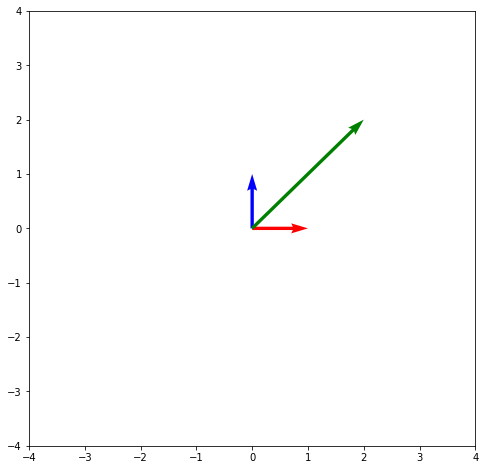

In [2]:
V = np.array([
              [1,0,2],
              [0,1,2]
])

origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(*origin, V[0,:], V[1,:], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.axis([-4, 4, -4, 4])
plt.show()

There are many things that are beautiful about linear algebra, but one of the most beautiful is that if we know what a transform does to the basis vectors we know what it does to all other vectors. And it is very simple to specify exactly what a transform matrix does to the basis vectors. In 2D, a transform matrix is $2 \times 2$. The first column indicates the updated position of where the original basis vector from the $x$ axis lands after the transform, and the second column gives the coordinates of where the $y$ basis vector lands after the transform. The first row of the matrix is the $x$ position of these landing point, and the second rows is the $y$ position of the landing point. 

Let's consider the identity matrix, which applies a transform that results in an updated vector that is exactly the same as the input vector. This matrix has $1$'s on the diagonal and is $0$ everywhere else. We will call the original $x$ and $y$ positions of the vector $x$ and $y$, and the updated positions $x_u$ and $y_u$. Following the [rules of matrix multiplication](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:multiplying-matrices-by-matrices/v/matrix-multiplication-intro):

$
V_u = \
\begin{bmatrix}
x_u \cr
y_u \cr
\end{bmatrix}
= 
\begin{bmatrix}
1 & 0 \cr
0 & 1 \cr
\end{bmatrix}
\begin{bmatrix}
x \cr
y \cr
\end{bmatrix}
=
\begin{bmatrix}
1x + 0y \cr
0x + 1y \cr
\end{bmatrix}
=
\begin{bmatrix}
x \cr
y \cr
\end{bmatrix}
$

In Python, that looks like this:

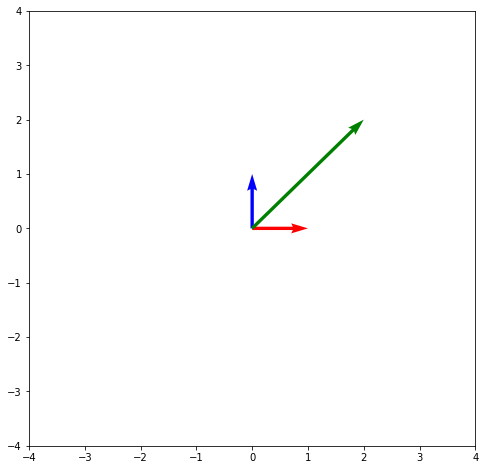

In [3]:
Identity = np.array([
              [1,0],
              [0,1]
])

V_updated = Identity @ V

fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(*origin, V_updated[0,:], V_updated[1,:], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.axis([-4, 4, -4, 4])
plt.show()

Now that we know what a transform that does nothing looks like, we can start to understand transforms that do do something.

#### Scaling transforms

To implement a scaling transform that elongates or shortens all vectors by a fixed proportion, we just multiply the identity matrix by a scaling factor. For example, say you want to scale an object by a factor of $2$. The needed transform matrix is just the identity matrix multiplied by 2. It has $2$'s on the diagonal, and $0$ everywhere else. It indicates that the original basis vector for $x$, which is $(1,0)$, should land at $(2,0)$ after the transform, and that the $y$ basis vector $(0,1)$ should land at $(0,2)$:

$
V_u = \
\begin{bmatrix}
x_u \cr
y_u \cr
\end{bmatrix}
= 
\begin{bmatrix}
2 & 0 \cr
0 & 2 \cr
\end{bmatrix}
\begin{bmatrix}
x \cr
y \cr
\end{bmatrix}
=
\begin{bmatrix}
2x + 0y \cr
0x + 2y \cr
\end{bmatrix}
=
\begin{bmatrix}
2x \cr
2y \cr
\end{bmatrix}
$

This is how it looks in Python:

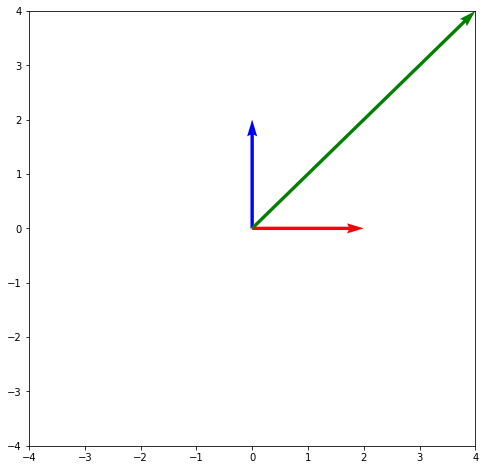

In [4]:
Scale = np.array([
              [2,0],
              [0,2]
])

V_updated = Scale @ V

fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(*origin, V_updated[0,:], V_updated[1,:], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.axis([-4, 4, -4, 4])
plt.show()

#### Rotation transformations

Let's consider a $\pi/2$ radian, ie 90 degree, rotation counter clockwise. The original basis vector for $x$, which is $(1,0)$, should land at $(0,1)$ after the transform, and the $y$ basis vector $(0,1)$ should land at $(-1,0)$ after the transform. We can use the change of basis concepts introduced above to create a rotation transform based on these landing points:

$
V_u = \
\begin{bmatrix}
x_u \cr
y_u \cr
\end{bmatrix}
= 
\begin{bmatrix}
0 & -1 \cr
1 & 0 \cr
\end{bmatrix}
\begin{bmatrix}
x \cr
y \cr
\end{bmatrix}
=
\begin{bmatrix}
0x - 1y \cr
1x + 0y \cr
\end{bmatrix}
=
\begin{bmatrix}
-y \cr
x \cr
\end{bmatrix}
$

This is how it looks in Python:

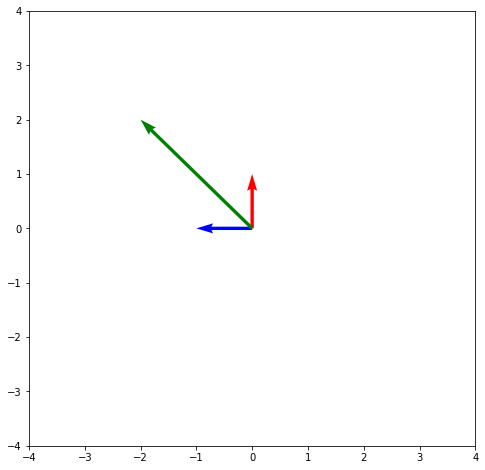

In [5]:
Rotation90 = np.array([
              [0,-1],
              [1, 0]
])

V_updated = Rotation90 @ V

fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(*origin, V_updated[0,:], V_updated[1,:], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.axis([-4, 4, -4, 4])
plt.show()

#### Translation transforms

In a translation, each point is shifted by some fixed amount, for example by adding $2$ to the $x$ values. There is no way to construct a transform matrix with the same number of dimensions you are working in that does this with matrix multiplication. The gist is that, using multiplication, there is no way to move the coordinates of different vertices by a fixed amount. If the $x$ value of one vertex is twice the value of the $x$ of another coordinate, then the first $x$ will be shifted twice as far as the second when multiplying by the same amount.

In mathematical terms, the issue is that translations are not linear transforms. Gil Strang explains the details in [this clip](https://www.youtube.com/watch?v=Ts3o2I8_Mxc&t=322s). This makes translation fundamentally different than scaling and rotation transforms. But we *can* build linear transforms that have the same effect as translations if we add a dimension.

#### Projection transforms

Like translations, these are implemented in a higher dimension. We will discuss projection again after we introduce higher dimension transforms.



### 3D graphics are done in 4D

One of the most interesting things about the implementation of 3D graphics is that they are done in 4D, rather than 3D. This gives us a fourth axis, $w$, to work with. This has a few big advantages.

A critical advantage is that it allows us to implement translations of coordinates (ie, shifting points by adding specific values to them) as shears in 4D rather than as additions in 3D. This allows us to create linear transforms that can shift objects around in space by a given distance.

### Translation - A 1D example

First consider the 1D case, where we are only working with $x$. In this example we have three vectors, each corresponding to the location of a vertex. The heads are at $x_0=1$, $x_1=2$, and $x_2=3$.

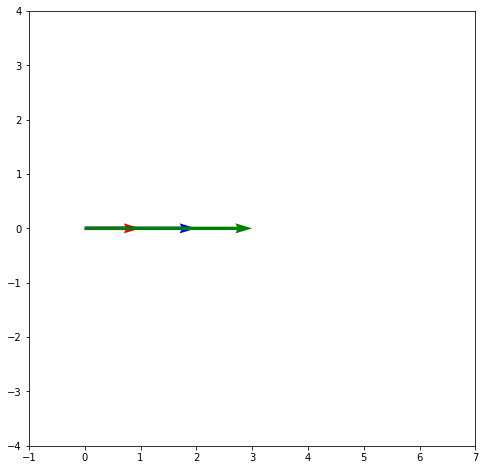

In [6]:
# This is actually implemented as a 2D array, but we are just zeroing out and ignoring y
V = np.array([
              [1,2,3],
              [0,0,0]
])

origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(*origin, V[0,:], V[1,:], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.axis([-1, 7, -4, 4])
plt.show()

Now say our goal is to add 2 to the $x$ position of each. This clearly can't be done with a constant multiplier in one dimension, Multiplying by $2$ for example would have the desired effect on the vector that starts with length $2$, but the other vectors change by lengths of $1$ and $3$. 

But we can add a fixed value to all $x$ positions by adding a dimension and moving the problem to a shear transform in 2D. Let's keep the $x$ value of each vector the same, but set each $y$ value to $1$.

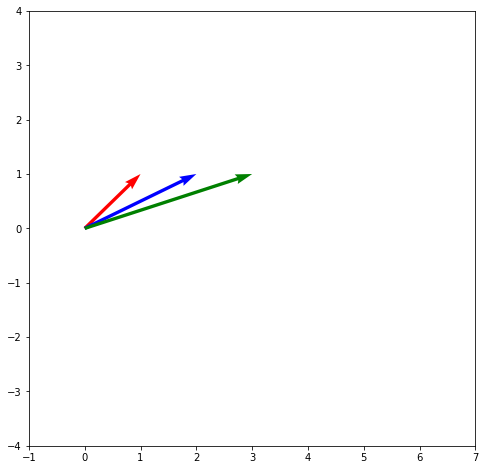

In [7]:
V = np.array([
              [1,2,3],
              [1,1,1]
])

origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(*origin, V[0,:], V[1,:], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.axis([-1, 7, -4, 4])
plt.show()

The $x$ values are unchanged, each vector just now also has a $y$ component of $1$. Now let's multiply by the identity matrix, which keeps the $x$ and $y$ values the same.

Clearly, multiplying by the identity matrix has no impact on the result above.

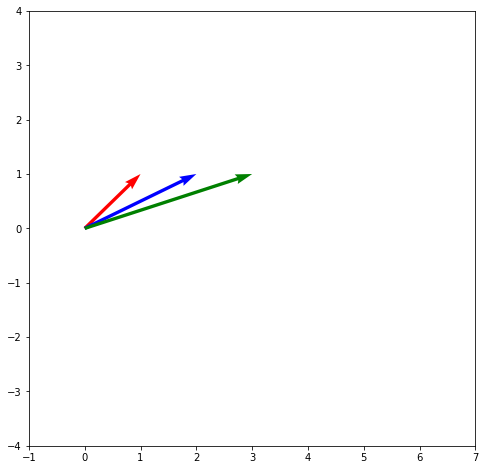

In [8]:
I = np.array([
              [1,0],
              [0,1]
])

V_updated = I @ V

fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(*origin, V[0,:], V[1,:], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.axis([-1, 7, -4, 4])
plt.show()

Now we will do a shear transform rather than an identity transform. The shear that moves all $x$ values by $2$ looks like this, given that $y=1$:

$
V_u = \
\begin{bmatrix}
x_u \cr
y_u \cr
\end{bmatrix}
= 
\begin{bmatrix}
1 & 2 \cr
0 & 1 \cr
\end{bmatrix}
\begin{bmatrix}
x \cr
y \cr
\end{bmatrix}
=
\begin{bmatrix}
1x + 2y \cr
0x + 1y \cr
\end{bmatrix}
=
\begin{bmatrix}
x+2 \cr
1 \cr
\end{bmatrix}
$

The shear allows us to essentially tip all the data over in our new dimension $y$ to slide $x$ the desired amount to the right. One way to think of this is that by stuffing $1$'s into the $y$ values, we can multiply that those $1$'s by whatever value we want and the prduct is added to the $x$ position.

In Python, it looks like this:

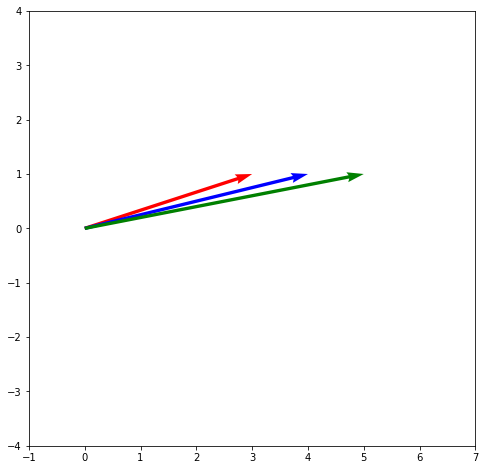

In [9]:
Shear = np.array([
              [1,2],
              [0,1]
])

V_updated = Shear @ V

fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(*origin, V_updated[0,:], V_updated[1,:], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.axis([-1, 7, -4, 4])
plt.show()


Once we have done the shear, we can just throw away the $y$ component if we like and we are left with the translated $x$ values.

Though it is much harder to imagine, the exact same concept applies in 3D. We can translate 3D objects by adding a fourth dimension, by convention denoted $w$, and stuff $1$'s into $w$. We can translate 3D objects by shearing (tipping them over a bit) in 4D.

### Perspective transforms

If we ignored $z$ and $w$ we could project every point in our world onto the $x,y$ plane. This is called orthographic projection. It does not, however, gice a sense of perspective. To get perspective we need to move vertices that are further from the camera (ie, that have a more negative $z$) closer to the $x,y$ origin. This scales objects, so that things that are further away appear smaller. The way we do this is to actually make them smaller.

We need to also have a rudimentary model of the camera we are using, since this impacts the projection. The camera is located at the origin, looking down the $z$ axis in the negative direction. The volume it can see is referred to as the frustum - it is a four sided pyramid with its point at the camera and its base infinitely far from the camera. We are going to chop the frutum pyramid down to finite size. The parameters we will consider are:

- The Field of View (FOV). This is the angle between the walls of the frustum pyramid where they meet in a point at the camera. Larger angles are like wide angle lenses, smaller angles are like telephoto lenses.

- The $z$ coordinate of the near plane. We are going to chop the tip off the pyramid at this plane to create a truncated pyramid. This simplifies some math later.

- The $z$ coordinate of the far plane. This provides a base to the pyramid.

We clip (don't show) anything in front of the near plane or behind the far plane.

The projection matrix will warp the truncated pyramid of our cllipped frustum into a cube. This requires streatching close to the camera and/or squishing further from the camera.

Rather than show how to derive this matrix, we will just show the matrix and explain how it works. First, we define a few terms derived from field of view $\theta$, near plane position $z_{near}$, and far plane position $z_{far}$:

$a=\frac{1}{tan(\theta)}$

$b=\frac{z_{far}+z_{near}}{z_{far}-z_{near}}$

$c=\frac{2 z_{far} z_{near}}{z_{far}-z_{near}}$

The Projection matrix $P$ is then:

\begin{bmatrix}
a & 0 & 0 & 0 \cr
0 & a & 0 & 0 \cr
0 & 0 & b & -1 \cr
0 & 0 & c & 0 \cr
\end{bmatrix}

$a,b,c$ provide the scaling factors needed to apply the field of view angle and to get points in the near and far plane to land in the correct place.

The perspective effect - where $x$ and $y$ are moved closer to the center with mroe negative $z$ - come from the last row. The key here is that placing the $c$ in the third column of the fourth row stuffs the third coordinate, $z$, into the fourth coordinate, $w$.

Then prior to drawing the vertices, we divide each column of $V_u$ by the $w$ value in its last row. This scales each vertex so that $w$ is again $1$. Since that $w$ comes from the original $z$ value, the larger the magnitude of the original $z$ (ie, the more negative it was, indicating that it was further away), the larger the denominator and the more reduced the $x$ and $y$ values become.

### Why is it so important that transforms are linear?

The reason we want all our transforms to be linear is that we can then chain them together as a series of matrix multiplications. We are almost always applying multiple transforms to a given object to compose a scene. A typical sequence of transforms might move the position of the object in world space (with a translation matrix $T$ that does a higher dimensional shear), rotate the object with rotation matrix $R$, and then applying perspective to the scence with projection matrix $P$. The order of these transformations matters, if you do them in a different sequence they will give a different end result. To get the desired transformation, we arrange them as a sequence of matrix multiplications with the first transform on the right and the last one on the left. In this example, that would be:

$V_u=PRTV$

Where $V$ is the matrix of original vertex coordinates (one vertex per column) and $V_u$ is the matrix of updated coordinates after the transform.

Though the order of the matrices in the multiplication matters, because matrix multiplication is commutative, we can implement the multiplications in any order we like. We could, for example, first multiply $PR$ and then multiply everything else by the result of that multiplication:

$V_u=(PR)TV$

The dimensions of the transform matrices are $m \times m$, where $m$ is the number of dimensions we are working in ($m=4$ for 3D graphics since we added a $w$ dimension). The dimensions of $V$ and $V_u$ are $m \times n$, where $n$ is the number of vertices. Each vertex is a column in that matrix. There can be millions of vertices that need to be transformed 120 times a second in a modern game. This would make it very expensive to apply each transform in sequence to the data, according to this multiplication order:

$V_u=(P(R(TV)))$

Since we would need to do three multiplications, each with millions of operations.

Instead, we can first multiply the independent transforms together to make a compound transform matrix that we only need to multiply by the giant $V$ matrix once:

$V_u=(P(RT))V$

Since the transform matrices are $4 \times 4$, the first three multiplications involve only a few dozen calculations. Then we apply them all at once to the giant $V$ matrix. This results in considerable economies.



## A spinning cube

Now we put everything together to present you with a spinning cube.

In [10]:


def make_cube(edge_length):
  """
  Create a numpy array with the vertices of a cube, centered on the origin
  and with edge length edge_length
  """
  
  # x, y, z, w
  # z is depth, larger z is closer
  vertices = edge_length / 2 * np.array([
    [ 1, 1, 1],
    [ 1,-1, 1],
    [-1,-1, 1],
    [-1, 1, 1],
    [ 1, 1,-1],
    [ 1,-1,-1],
    [-1,-1,-1],
    [-1, 1,-1]
  ])

  # Add the w separately, since we don't want this to scale be edge_length
  new_col = np.ones((vertices.shape[0],1))
  vertices = np.append(vertices, new_col, 1)
  vertices = vertices.T # We want each column to be a vertex. Rows are x, y, z, w

  # Wind each face according to right hand rule
  # Each element is the column index of the appropriate vertex
  polygons = np.array([
    [0,1,2,3], # front
    [4,5,6,7], # back
    [0,4,7,3], # top
    [1,2,6,5], # bottom
    [0,1,5,4], # right
    [3,7,6,2]  # left
  ], dtype='i')

  return vertices, polygons

def rotation_y(theta):
  """
  Construct a matrix that rotates about the y axis by theta radians
  """

  R = np.array([
    [np.cos(theta),0,np.sin(theta),0],
    [0,1,0,0],
    [-np.sin(theta),0,np.cos(theta),0],
    [0,0,0,1]
  ])

  return R


def make_lines(vertices,polygons):
  """
  Given vertices and polygons, return an array where each column is a vertex 
  coordinate and drawing lines between adjacent coordinates draws all the edge 
  of all the polygons.
  """

  # Need to normalize all w values to 1, so divide each column by its w value.
  # This is critical for perspective
  v = vertices / vertices[[3],:]

  # Duplicate first column as last so winding ends where it starts
  p = np.append(polygons, polygons[:,[0]], axis=1)

  # Row wise flattening. This is a shortcut that draws all polygons with a 
  # single line, and only works when the last edge in one polygon is the 
  # first edge in the next polygon
  winding = np.reshape( p, -1 ) 

  # Create a new matrix where each column is the coordinates of the next vertex 
  # to draw a line to
  return v[:,tuple(winding)]

def update(frame_number, ):
  """
  Update the plot for each frame of the animation
  """

  # This single line of matrix multiplications, read from right to left, 
  # rolls up all the transforms specified by each transform matrix into a 
  # combined transform matrix.
  # The transforms, read from right to left in the multiplication, first 
  # rotate by an angle that depends on the frame number, then the oject 
  # coordinates are sheared by the World matrix to place the object it in World 
  # coordinate space, and finally the Projection matrix is applied to generate 
  # perspective.
  transform = Projection @ World @ rotation_y(frame_number * 0.05 )

  # Now we apply the combined transforms to all the vertices
  updated_vertices =  transform @ vertices

  # Update the plot
  lines = make_lines( updated_vertices, polygons)
  line.set_xdata(lines[0, :])
  line.set_ydata(lines[1, :])


# Set up initial values

# Construct the World matrix that shifts vertices from object coordinates to 
# world coordinates

# Start with an identity matrix
World = np.identity(4)

# Add a w entry that shears z two units away from the user, ie places the oject 
# further from the user
World[2,3] = -2

# Construct the proection matrix that warps the fustrum from a truncated 
# pyramid into a cube. This creates x,y coordines that when projected onto 
# the plane of the screen give a sense of perspective, ie vertices further from 
# the camera or moved closer to the center of the screen.

# Set the field of view, the angle between the lines that define the edges of 
# the view. Smaller angles are equivalent to longer lenses, ie are more zoomed in
fov = np.pi / 3  # 60 degrees
a = 1/np.tan(fov/2)

# Since the camera is at 0,0,0 for now, near and far should both be less than 0
near = -1
far = -10
b = (far+near)/(far-near)
c = (2*far*near)/(far-near)

Projection = np.array([
  [a,0,0, 0],
  [0,a,0, 0],
  [0,0,b,-1],
  [0,0,c, 0]
])

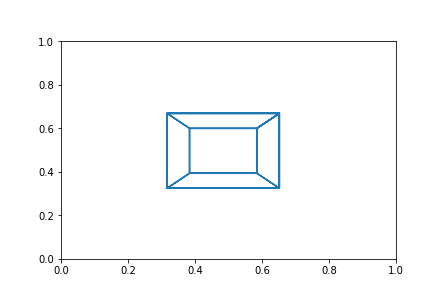

In [11]:
# Create new Figure, get an Axes object, and set the x,y limits of the plot
fig, ax = plt.subplots()
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(-1, 1), ax.set_xticks([])
ax.set_ylim(-1, 1), ax.set_yticks([])

# Generate the cube
vertices, polygons = make_cube(1)

# Draw a first frame
vertices_0 = Projection @ World  @ rotation_y(0) @ vertices
lines = make_lines( vertices_0, polygons)
line, = ax.plot(lines[0, :], lines[1, :])

# Construct the animation, and specify that each frame should be updated 
# by the update function
# Implementation of animation (chage through time) builds on:
#   https://matplotlib.org/stable/gallery/animation/simple_anim.html
#   https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb#scrollTo=rIqpm5rb-Tc8

ani = animation.FuncAnimation(fig, update, interval=20, frames=200)
HTML(ani.to_html5_video())

## Scrap



In [12]:
print(vertices)

[[ 0.5  0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5]
 [ 0.5  0.5  0.5  0.5 -0.5 -0.5 -0.5 -0.5]
 [ 1.   1.   1.   1.   1.   1.   1.   1. ]]


In [13]:
print(World @ vertices)

[[ 0.5  0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5]
 [-1.5 -1.5 -1.5 -1.5 -2.5 -2.5 -2.5 -2.5]
 [ 1.   1.   1.   1.   1.   1.   1.   1. ]]


In [14]:
print(Projection)

[[ 1.73205081  0.          0.          0.        ]
 [ 0.          1.73205081  0.          0.        ]
 [ 0.          0.          1.22222222 -1.        ]
 [ 0.          0.         -2.22222222  0.        ]]


In [15]:
V_u = Projection @ World @ vertices
np.set_printoptions(precision=2)
print(V_u)

[[ 0.87  0.87 -0.87 -0.87  0.87  0.87 -0.87 -0.87]
 [ 0.87 -0.87 -0.87  0.87  0.87 -0.87 -0.87  0.87]
 [-2.83 -2.83 -2.83 -2.83 -4.06 -4.06 -4.06 -4.06]
 [ 3.33  3.33  3.33  3.33  5.56  5.56  5.56  5.56]]


In [16]:
v_normalized = V_u / V_u[[3],:]
print(v_normalized)

[[ 0.26  0.26 -0.26 -0.26  0.16  0.16 -0.16 -0.16]
 [ 0.26 -0.26 -0.26  0.26  0.16 -0.16 -0.16  0.16]
 [-0.85 -0.85 -0.85 -0.85 -0.73 -0.73 -0.73 -0.73]
 [ 1.    1.    1.    1.    1.    1.    1.    1.  ]]
